# Load all the required Libraries

In [279]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit, train_test_split 
from sklearn.learning_curve import learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
#import visuals as vs

# Data Preparation

### Load the csv file 

In [160]:
phooddata18 = pd.read_csv("foodlogloc18.csv")

In [161]:
phooddata18.head(5)

,Unnamed: 0,X,id,itemname,itemtype,datecreated,datedumped,mealtype,actiontaken,actionreason,quantity,quantitytype,locationid
0,18528,19817,21082,Grill,Menu,2017-06-22 17:49:19,2017-06-22,Lunch,Composted,Over Production,4.6,Pound,18
1,18543,19832,21099,Hot Line,Menu,2017-07-12 12:58:06,2017-07-12,Breakfast,Discarded,Over Production,4.6,Pound,18
2,18544,19833,21100,Post Consumer,Menu,2017-07-12 13:27:42,2017-07-12,Breakfast,Composted,Over Production,12.5,Pound,18
3,18545,19834,21101,Trim Waste,Menu,2017-07-12 13:34:35,2017-07-12,Breakfast,Composted,Over Production,22.0,Pound,18
4,18546,19835,21102,Trim Waste,Menu,2017-07-12 17:45:15,2017-07-12,Lunch,Composted,Over Production,12.0,Pound,18


In [162]:
phooddata18.describe()

,Unnamed: 0,X,id,quantity,locationid
count,690.000000,690.000000,690.000000,690.000000,690.0
mean,19876.028986,21178.163768,22492.943478,15.444058,18.0
std,1421.738120,1428.895412,1487.639264,12.312209,0.0
min,18528.000000,19817.000000,21082.000000,0.000000,18.0
25%,18726.250000,20015.250000,21290.250000,6.525000,18.0
50%,19171.500000,20477.500000,21755.500000,12.450000,18.0
75%,21678.750000,22989.750000,24335.750000,21.400000,18.0
max,22393.000000,23704.000000,25136.000000,85.000000,18.0


### Clean Null Values

In [163]:
phooddata18clean = phooddata18[phooddata18.notnull()]

In [164]:
phooddata18clean.head(5)

,Unnamed: 0,X,id,itemname,itemtype,datecreated,datedumped,mealtype,actiontaken,actionreason,quantity,quantitytype,locationid
0,18528,19817,21082,Grill,Menu,2017-06-22 17:49:19,2017-06-22,Lunch,Composted,Over Production,4.6,Pound,18
1,18543,19832,21099,Hot Line,Menu,2017-07-12 12:58:06,2017-07-12,Breakfast,Discarded,Over Production,4.6,Pound,18
2,18544,19833,21100,Post Consumer,Menu,2017-07-12 13:27:42,2017-07-12,Breakfast,Composted,Over Production,12.5,Pound,18
3,18545,19834,21101,Trim Waste,Menu,2017-07-12 13:34:35,2017-07-12,Breakfast,Composted,Over Production,22.0,Pound,18
4,18546,19835,21102,Trim Waste,Menu,2017-07-12 17:45:15,2017-07-12,Lunch,Composted,Over Production,12.0,Pound,18


In [165]:
phooddata18clean.describe()

,Unnamed: 0,X,id,quantity,locationid
count,690.000000,690.000000,690.000000,690.000000,690.0
mean,19876.028986,21178.163768,22492.943478,15.444058,18.0
std,1421.738120,1428.895412,1487.639264,12.312209,0.0
min,18528.000000,19817.000000,21082.000000,0.000000,18.0
25%,18726.250000,20015.250000,21290.250000,6.525000,18.0
50%,19171.500000,20477.500000,21755.500000,12.450000,18.0
75%,21678.750000,22989.750000,24335.750000,21.400000,18.0
max,22393.000000,23704.000000,25136.000000,85.000000,18.0


### Details of our data

In [166]:
pandas_profiling.ProfileReport(phooddata18clean)

Number of variables,13
Number of observations,690
Total Missing (%),0.0%
Total size in memory,70.2 KiB
Average record size in memory,104.1 B
Numeric,2
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,5


## Feature Selection

### Removing unimportant variables

In [167]:
phooddata18cleanfilter = phooddata18clean.filter(['itemname','datedumped','mealtype','quantity'], axis=1)

In [168]:
pandas_profiling.ProfileReport(phooddata18cleanfilter)

Number of variables,4
Number of observations,690
Total Missing (%),0.0%
Total size in memory,21.6 KiB
Average record size in memory,32.1 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Change Date Time function

In [169]:
phooddata18cleanfilter['date'] = pd.to_datetime(phooddata18cleanfilter['datedumped'])
#phooddata18cleanfilter['date'] = [time.date() for time in phooddata18cleanfilter['date']]

In [170]:
phooddata18cleanfilter.head(5)

,itemname,datedumped,mealtype,quantity,date
0,Grill,2017-06-22,Lunch,4.6,2017-06-22
1,Hot Line,2017-07-12,Breakfast,4.6,2017-07-12
2,Post Consumer,2017-07-12,Breakfast,12.5,2017-07-12
3,Trim Waste,2017-07-12,Breakfast,22.0,2017-07-12
4,Trim Waste,2017-07-12,Lunch,12.0,2017-07-12


In [171]:
phooddata18cleanfilter = phooddata18cleanfilter.drop(['datedumped'], axis=1)

In [172]:
pandas_profiling.ProfileReport(phooddata18cleanfilter)

Number of variables,4
Number of observations,690
Total Missing (%),0.0%
Total size in memory,21.6 KiB
Average record size in memory,32.1 B
Numeric,1
Categorical,2
Boolean,0
Date,1
Text (Unique),0
Rejected,0


### One Hot Encoding

In [173]:
#One-hot encode categorical features
phooddata18cleanfilter = pd.get_dummies(phooddata18cleanfilter)
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,2017-06-22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,2017-07-12,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,2017-07-12,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


(array([736511., 736542., 736573., 736603., 736634., 736664.]),
 <a list of 6 Text xticklabel objects>)

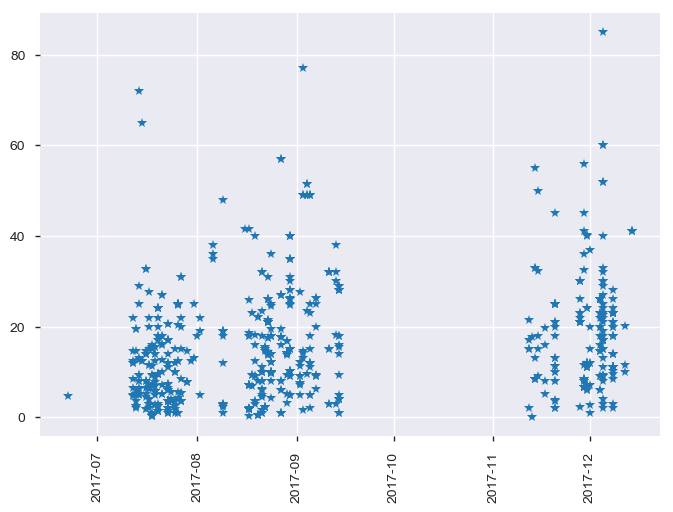

In [174]:
plt.plot(phooddata18cleanfilter['date'], phooddata18cleanfilter['quantity'], '*')
plt.xticks(rotation='vertical')

In [175]:
pandas_profiling.ProfileReport(phooddata18cleanfilter)

Number of variables,17
Number of observations,690
Total Missing (%),0.0%
Total size in memory,21.0 KiB
Average record size in memory,31.1 B
Numeric,1
Categorical,0
Boolean,15
Date,1
Text (Unique),0
Rejected,0


In [176]:
phooddata18cleanfilter['date'].min()

Timestamp('2017-06-22 00:00:00')

In [177]:
phooddata18cleanfilter['date'].max()

Timestamp('2017-12-14 00:00:00')

## Date Time other approach


#### python 
*** <br><font color=blue>_phooddata18cleanfilter['year'] = phooddata18cleanfilter.date.dt.year<br>  phooddata18cleanfilter['month'] = phooddata18cleanfilter.date.dt.month  <br>phooddata18cleanfilter['day'] = phooddata18cleanfilter.date.dt.day_</font>

In [178]:
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,2017-06-22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,2017-07-12,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,2017-07-12,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [179]:
phooddata18cleanfilter['date'] = phooddata18cleanfilter['date'].apply(lambda x: x.toordinal())

In [180]:
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,736502,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,736522,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,736522,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,736522,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,736522,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [181]:
phooddata18cleanfilter['date'] = (phooddata18cleanfilter['date'] - min(phooddata18cleanfilter['date'])+1)

In [182]:
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,21,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,21,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,21,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Training and Testing Sets

### Features and Labels

In [183]:
features = phooddata18cleanfilter

In [184]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [185]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [186]:
# Saving feature names for later use
feature_list = list(features.columns)

In [187]:
# Convert to numpy array
features = np.array(features)

In [188]:
labels

array([ 4.6,  4.6, 12.5, 22. , 12. , 12. , 14.5,  8.5,  5. ,  6.5,  5. ,
        6. , 14.5,  3.5,  2. , 19.5, 19.5,  5.2,  5.2,  2.5,  2.5,  2.5,
       29. , 13. ,  6.5, 25. ,  5. ,  9.2,  9.2, 72. ,  8. ,  8. ,  5.2,
        5.2, 12.6,  6.2, 12.5, 65. , 12.5,  5.2,  1.8,  1.8,  4.4, 14.5,
        8. ,  8. ,  6.4, 32.8, 32.8, 14. , 14. , 14. ,  7.2,  2.8, 19.8,
        4. ,  7.4,  6.6, 27.6,  4. , 21.8,  2. ,  6.2,  3. ,  3. , 15. ,
       11.5, 11.5, 11.2,  1. , 16. , 15.5,  9.3,  9.3, 15.2, 15. , 15.5,
        0.5,  7. ,  0.3,  0.3,  0.3,  6.8,  5. ,  2.7,  2.7,  7.8, 12.4,
        5.8,  5.8,  5.8,  5.8,  5.8,  8.8,  8.8, 14. , 14. , 15.4, 15.4,
        2.4,  2.4,  2.4,  9.6,  9.6,  9.6,  9.6,  9.6,  3. , 18. , 18. ,
       24. , 24. , 24. , 24. , 20. ,  1.4,  1.4,  1.4,  1.4, 22. , 17. ,
       17. , 16.2, 27. , 27. , 10. ,  5.2,  5.2,  7. , 18. , 18. , 16. ,
       12.6, 11. , 17. , 17. , 17. , 17. ,  6.5,  3.6,  1. ,  2. ,  2. ,
        2. ,  2. ,  1. , 14. , 12. , 12. ,  3.6,  3

In [189]:
features

array([[  1,   0,   0, ...,   0,   0,   1],
       [ 21,   0,   0, ...,   1,   0,   0],
       [ 21,   0,   0, ...,   1,   0,   0],
       ...,
       [176,   0,   0, ...,   1,   0,   0],
       [176,   0,   0, ...,   1,   0,   0],
       [176,   0,   0, ...,   1,   0,   0]])

In [190]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [191]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (517, 16)
Training Labels Shape: (517,)
Testing Features Shape: (173, 16)
Testing Labels Shape: (173,)


## Random Forest

In [192]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [193]:
train_features.dtype

dtype('int64')

In [194]:
train_labels.dtype

dtype('float64')

In [195]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [196]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [197]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [198]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.94 degrees.


In [199]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

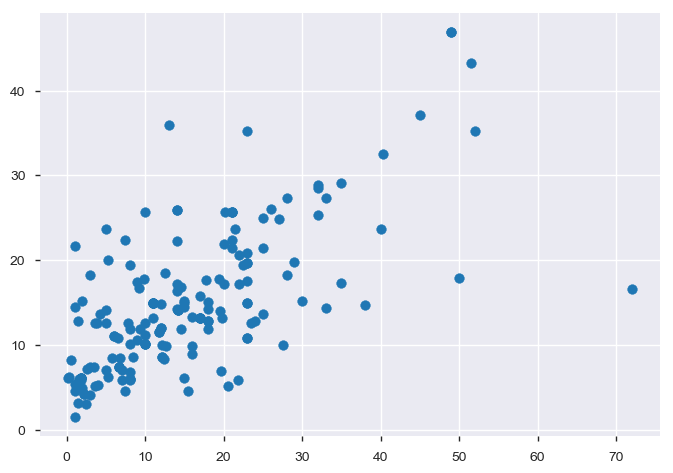

In [200]:
## The line / model
plt.scatter(test_labels, predictions)


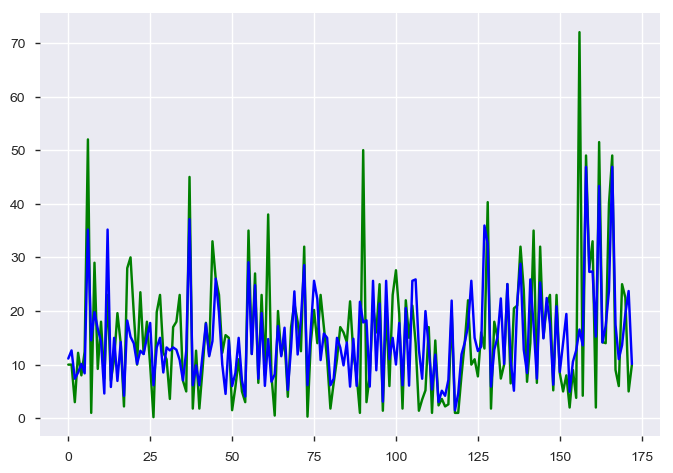

In [201]:
plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()

## Linear Regression

In [202]:
lm = LinearRegression()

In [203]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
lmpredictions = lm.predict(test_features)

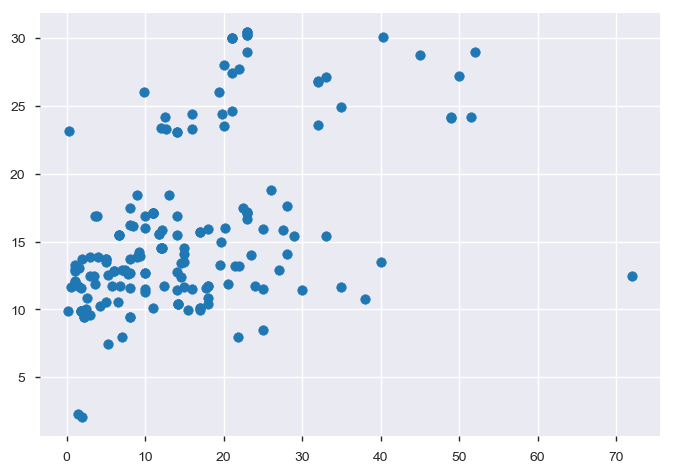

In [205]:
plt.scatter(test_labels,lmpredictions)

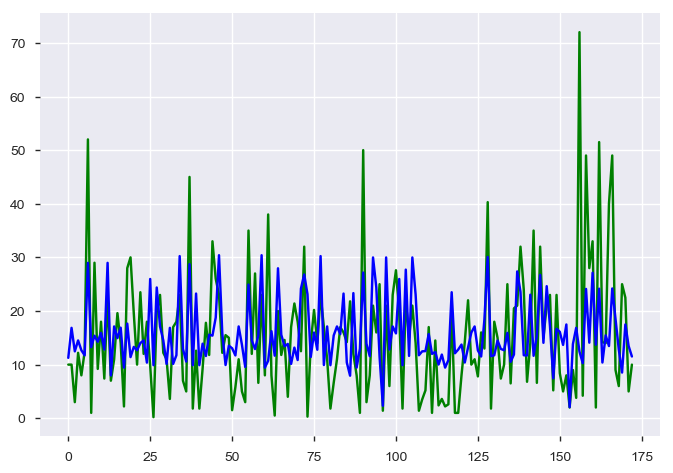

In [206]:
plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()

## Logistic Regression

In [207]:
logreg = LogisticRegression()

In [208]:
train_labels

array([21. ,  1.4, 35. , 14.5, 15. ,  8. , 10. , 17.6,  9.6, 20. , 17. ,
        7.8, 18.2,  5.8,  8.5,  5.8,  2. , 28. , 25. , 14.2, 32.5,  3.6,
        1. ,  9.2, 14.5,  4.4,  9.3, 11. ,  7.8, 22. , 11.5,  6. , 11. ,
       11. ,  3.6, 40. , 17.8, 21. , 77. , 26. , 15. , 15. , 23. ,  5. ,
       32. , 57. , 18.2,  0.3, 13. , 19.5, 10.2,  7. , 24.2,  0.5, 13.8,
       35. , 17. ,  1. ,  9.8,  5.2, 49. , 21.4,  6.5, 29. , 31. , 48. ,
       15. , 11. ,  6.6,  2.7, 10. , 10. , 37. , 12.5,  3.6, 22. , 23. ,
        7.9, 31. ,  8.8, 52. , 15. , 14.6,  9.2, 25. , 24. ,  6.2,  3.6,
       15. ,  9.8, 11.2, 23. , 24.8,  7. ,  5.8, 12. ,  1.4, 10. , 60. ,
        7. ,  4.6, 14. ,  6.6, 28. , 49. ,  1.4,  2.2, 26. , 26. , 11. ,
       26.2,  2. ,  8.5, 30. , 23. , 20. ,  8. , 11. ,  6.4,  9. , 15. ,
       41. , 12. ,  3. , 11.5,  7.9,  4.2,  2.4, 14. , 11. , 36. ,  3.6,
       17.5, 27. ,  3.6, 27. , 56. , 18. , 25. ,  5. ,  9. , 10.2, 24. ,
       27. ,  2. ,  2. , 85. ,  2.5, 12. , 40. , 21

In [209]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))

[ 89   4 114  67  69  41  51  79  49  86  77  39  82  28  43  28   7 105
  99  65 111  17   3  46  67  20  47  53  39  91  55  29  53  53  17 118
  80  89 131 101  69  69  93  24 109 128  82   1  62  85  52  35  96   2
  63 114  77   3  50  25 123  90  32 106 108 122  69  53  33  12  51  51
 116  60  17  91  93  40 108  44 125  69  68  46  99  95  30  17  69  50
  54  93  98  35  28  56   4  51 129  35  22  64  33 105 123   4   8 101
 101  53 102   7  43 107  93  86  41  53  31  45  69 119  56  14  55  40
  19   9  64  53 115  17  78 103  17 103 127  81  99  24  45  52  95 103
   7   7 132  10  56 118  89  69  67 101  99  51  27 107  54   6  73  81
   2  17  25   3  29  95  65  51  80  33 102  14  21  25  69  81  46  67
 101  58   3  89 101  44   6  64  93  54  69  14  18  56  41  32  86   9
  85 112  86 107  91  86  18  89  99   3  81  51  56  84  24 119  16  64
  65  56 130  17  35  53  52  76  51  35  41  99  27   3 101  56  45  93
  48  95 101  55 119  18  89  29  90   3  46  63 10

In [210]:
logreg.fit(train_features,train_labels_encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
logregpredictions = logreg.predict(test_features)

In [212]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

/Users/siddhant/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


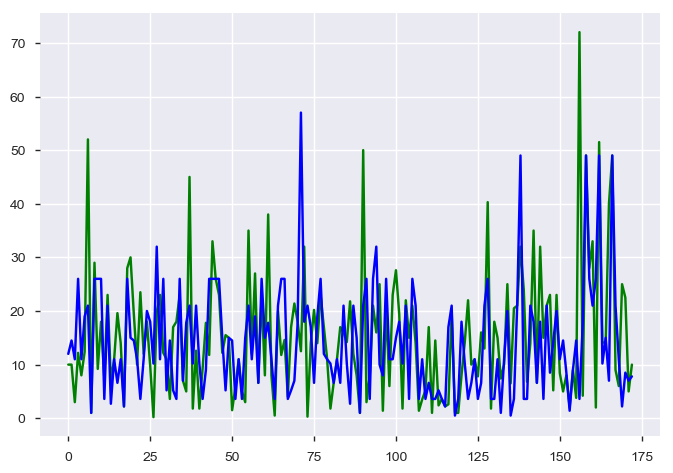

In [213]:
plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()

## Support Vector Machine

In [214]:
svmm = svm.SVC()

In [215]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))

continuous
multiclass
multiclass


In [216]:
svmm.fit(train_features,train_labels_encoded)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [217]:
svmpredictions = svmm.predict(test_features)

In [218]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

/Users/siddhant/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


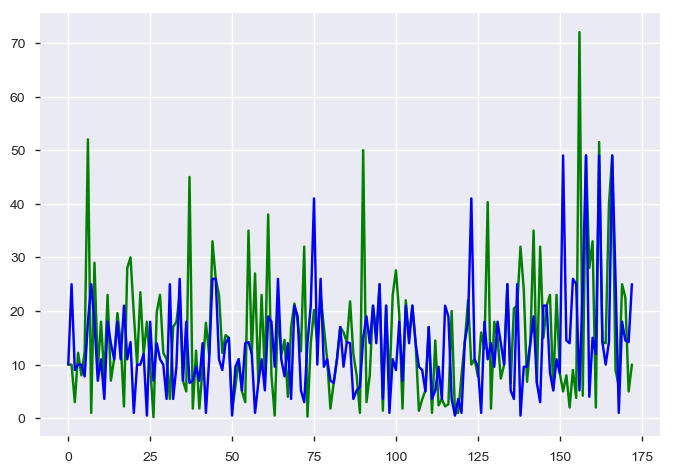

In [219]:
plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()

## Principal Component Analysis

In [225]:
pca = PCA()
regr = LinearRegression()

In [239]:
model = LinearRegression()
rfe = RFE(model,3)

In [240]:
fit_model=rfe.fit(train_features,train_labels)
print(fit_model.get_support())

[False False  True False  True False False False  True False False False
 False False False False]


In [243]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
print(model.feature_importances_)

[0.55618476 0.00576074 0.00498221 0.00827359 0.00304151 0.01745732
 0.02110037 0.00230138 0.00234366 0.21638654 0.01255449 0.
 0.04058758 0.02159069 0.04222983 0.04520533]


In [246]:
 etrpredictions= model.predict(test_features)

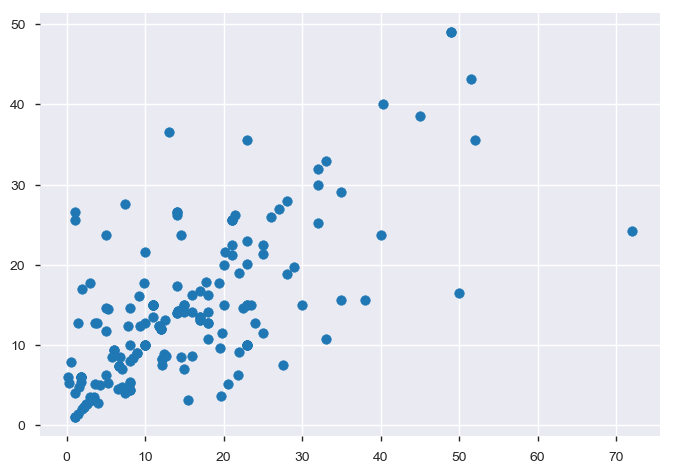

In [247]:
plt.scatter(test_labels,etrpredictions)

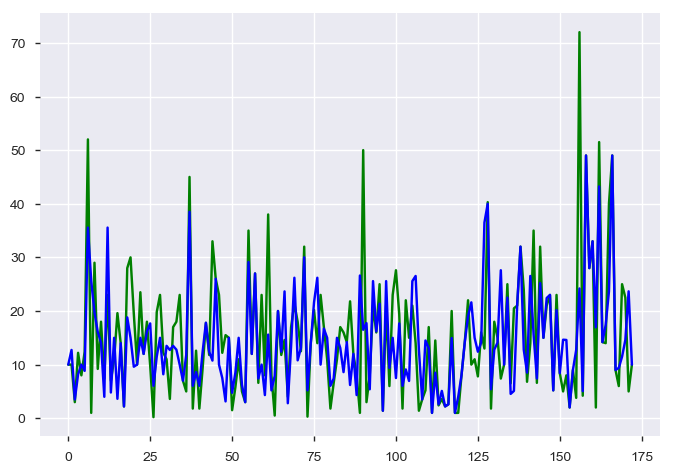

In [248]:
plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()

## Lasso Regression

In [251]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)


In [252]:
# Fit to data
lasso.fit(train_features,train_labels)


Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [254]:
lassopredictions= lasso.predict(test_features)

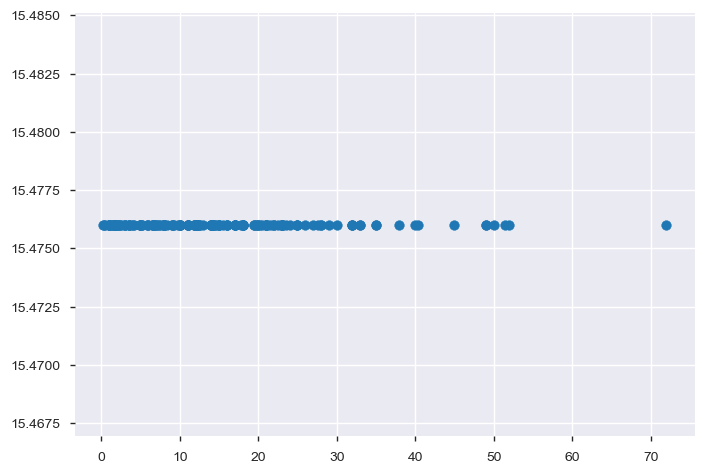

In [255]:
plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [256]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [257]:
predicted = gbrclf.predict(test_features)
expected = test_labels



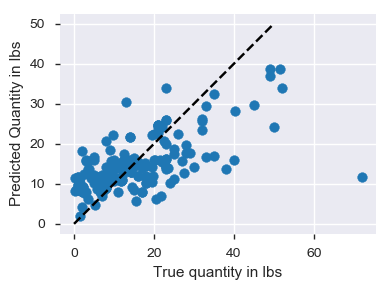

In [259]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()

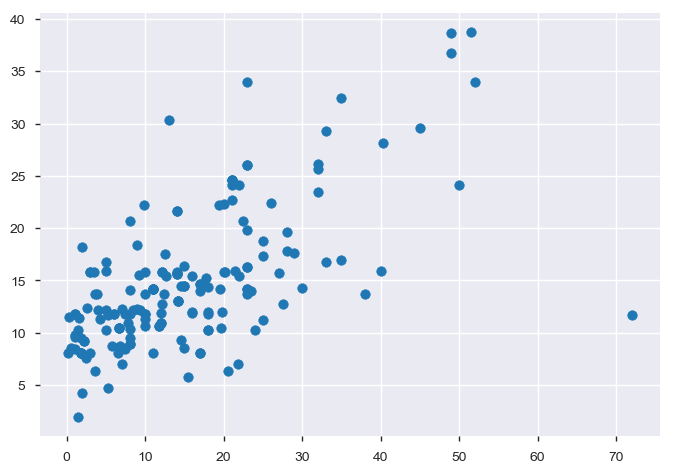

In [260]:
plt.scatter(test_labels,predicted)

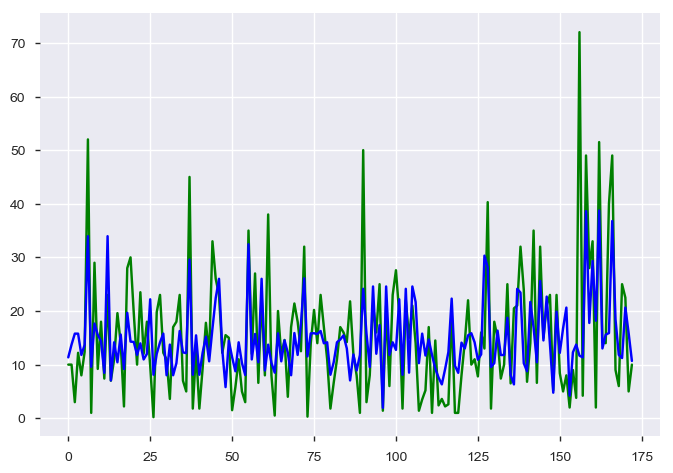

In [261]:
plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()

In [262]:

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()

RMS: 9.253931673019341 


In [274]:
 # Produce learning curves for varying training set sizes and maximum depths

vs.ModelLearning(train_features, train_labels)

NameError: name 'vs' is not defined

In [283]:
from vpython import *


ModuleNotFoundError: No module named 'vpython'